# GRIP Task 2: To Explore Supervised Machine Learning (Linear Regression)

# By Sayani Roy

## Problem: 
### To predict the percentage scores of a student based on his/her hours of study

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Importing the dataset

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url, error_bad_lines=False)
print("Data imported successfully")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## For summarizing the Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## For checking the Dimensions of the Dataframe

In [5]:
df.shape

(25, 2)

## For checking the Summary Statistics

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Checking for missing values

In [7]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

#### There is no missing value

## Plotting the distribution of scores

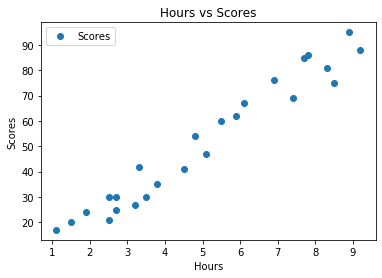

In [8]:
df.plot(x='Hours', y='Scores', style='o')    
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.title('Hours vs Scores')
plt.show()

#### From the graph we observe a positive relationship between hours studied and the scores obtained

## Preparing the data

In [9]:
X = df.iloc[:, :-1].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [10]:
y = df.iloc[:, -1].values
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


## Training the Simple Linear Regression model on the Training set

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

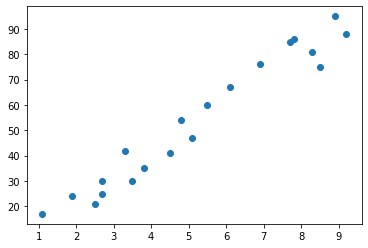

In [14]:
plt.scatter(X_train, y_train)
plt.show()

## Predicting the Test set results

In [15]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Visualising the Training set results

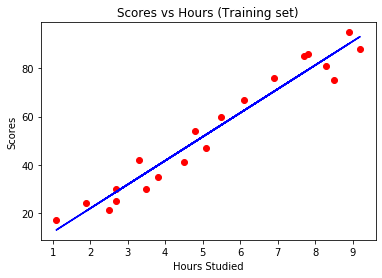

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Scores vs Hours (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

## Visualising the Test set results

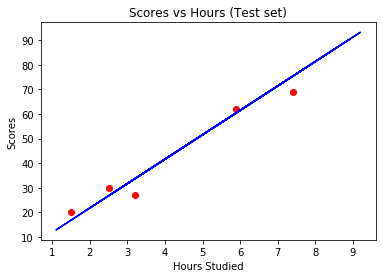

In [17]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Scores vs Hours (Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

## Comparing Actual vs Predicted

In [18]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


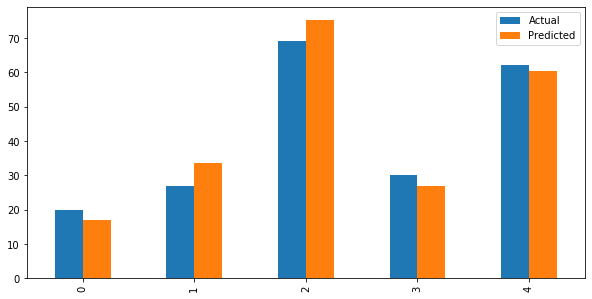

In [19]:
df1.plot(kind='bar',figsize=(10,5))
plt.show()

## Plotting the Regression Line

In [20]:
print(regressor.intercept_)

2.018160041434683


In [21]:
print(regressor.coef_)

[9.91065648]


In [22]:
line = regressor.coef_*X+regressor.intercept_

#### Therefore, the equation of our simple linear regression model is:
#### Scores = 9.91065648×Hours studied + 2.018160041434683

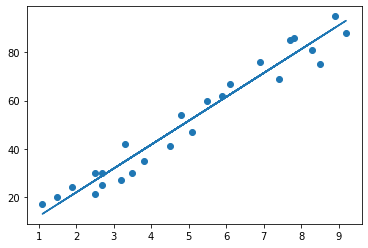

In [23]:
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Predicting Custom Data

In [24]:
prediction_score = regressor.predict([[9.25]])
print("Predicted score of a student studying 9.25 hours:", prediction_score)

Predicted score of a student studying 9.25 hours: [93.69173249]


#### According to the model, if a student studies for 9.25 hours he/she would obtain a score of 93.69173249

## Evaluating Model Performance

In [25]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
